In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plt
from datetime import datetime


# Load, Clean, and Manipulate The Data

In [2]:
df = pd.read_csv('covid_concern_polls.csv')

In [3]:
df.head()

,start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,very,somewhat,not_very,not_at_all,url
0,2020-01-27,2020-01-29,Morning Consult,NaN,2202,a,all,concern-economy,False,How concerned are you that the coronavirus wil...,19.0,33.0,23.0,11.0,https://morningconsult.com/wp-content/uploads/...
1,2020-01-31,2020-02-02,Morning Consult,NaN,2202,a,all,concern-economy,False,How concerned are you that the coronavirus wil...,26.0,32.0,25.0,7.0,https://morningconsult.com/wp-content/uploads/...
2,2020-02-02,2020-02-04,YouGov,Economist,1500,a,all,concern-infected,False,Taking into consideration both your risk of co...,13.0,26.0,43.0,18.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
3,2020-02-07,2020-02-09,Morning Consult,NaN,2200,a,all,concern-economy,False,How concerned are you that the coronavirus wil...,23.0,32.0,24.0,9.0,https://morningconsult.com/wp-content/uploads/...
4,2020-02-07,2020-02-09,YouGov,Huffington Post,1000,a,all,concern-infected,False,How concerned are you that you or someone in y...,11.0,24.0,33.0,20.0,https://projects.fivethirtyeight.com/polls/202...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   start_date   678 non-null    object 
 1   end_date     678 non-null    object 
 2   pollster     678 non-null    object 
 3   sponsor      270 non-null    object 
 4   sample_size  678 non-null    int64  
 5   population   678 non-null    object 
 6   party        678 non-null    object 
 7   subject      678 non-null    object 
 8   tracking     678 non-null    bool   
 9   text         678 non-null    object 
 10  very         678 non-null    float64
 11  somewhat     677 non-null    float64
 12  not_very     678 non-null    float64
 13  not_at_all   671 non-null    float64
 14  url          678 non-null    object 
dtypes: bool(1), float64(4), int64(1), object(9)
memory usage: 74.9+ KB


In [5]:
df.isnull().sum()

start_date       0
end_date         0
pollster         0
sponsor        408
sample_size      0
population       0
party            0
subject          0
tracking         0
text             0
very             0
somewhat         1
not_very         0
not_at_all       7
url              0
dtype: int64

In [6]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

In [7]:
df = df.drop(df.columns[[3,8,14]],axis = 1)

In [8]:
df.columns

Index(['start_date', 'end_date', 'pollster', 'sample_size', 'population',
       'party', 'subject', 'text', 'very', 'somewhat', 'not_very',
       'not_at_all'],
      dtype='object')

In [9]:
df['not_at_all'] = df.not_at_all.fillna(0.0).astype(float)

In [10]:
# Create a function to get the max and min for as many of these columns as possible
def find_minmax(x):
    min_index = df[x].idxmin()
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.iloc[high_index,:])
    low = pd.DataFrame(df.iloc[min_index,:])
    print('with Highest ' + x + ':', df['pollster'][high_index])
    print('with Lowest ' + x + ':', df['pollster'][min_index])
    return pd.concat([high,low], axis = 1)

find_minmax('sample_size')

with Highest sample_size: SurveyMonkey
with Lowest sample_size: Ipsos


,583,30
start_date,2020-10-26 00:00:00,2020-03-11 00:00:00
end_date,2020-11-01 00:00:00,2020-03-12 00:00:00
pollster,SurveyMonkey,Ipsos
sample_size,91214,502
population,a,a
party,all,all
subject,concern-economy,concern-infected
text,How worried are you that the coronavirus outbr...,How concerned are you that you or someone you ...
very,60.0,26.0
somewhat,29.0,40.0


In [11]:
find_minmax('very')

with Highest very: AP-NORC
with Lowest very: Gallup


,83,358
start_date,2020-03-26 00:00:00,2020-06-01 00:00:00
end_date,2020-03-29 00:00:00,2020-06-07 00:00:00
pollster,AP-NORC,Gallup
sample_size,1057,4000
population,a,a
party,all,all
subject,concern-economy,concern-infected
text,How concerned are you that the coronavirus out...,How worried are you that you will get the coro...
very,73.0,8.0
somewhat,22.0,39.0


In [12]:
find_minmax('not_very')

with Highest not_very: YouGov
with Lowest not_very: Morning Consult


,2,58
start_date,2020-02-02 00:00:00,2020-03-20 00:00:00
end_date,2020-02-04 00:00:00,2020-03-22 00:00:00
pollster,YouGov,Morning Consult
sample_size,1500,2200
population,a,a
party,all,all
subject,concern-infected,concern-economy
text,Taking into consideration both your risk of co...,How concerned are you that the coronavirus wil...
very,13.0,71.0
somewhat,26.0,19.0


In [13]:
find_minmax('not_at_all')

with Highest not_at_all: Civiqs
with Lowest not_at_all: Echelon Insights


,352,570
start_date,2020-06-01 00:00:00,2020-10-16 00:00:00
end_date,2020-06-03 00:00:00,2020-10-22 00:00:00
pollster,Civiqs,Echelon Insights
sample_size,1327,1006
population,a,lv
party,all,all
subject,concern-infected,concern-infected
text,"How worried are you that you, personally, will...",How personally concerned are you about the cha...
very,14.0,49.0
somewhat,37.0,27.0


In [14]:
find_minmax('somewhat')

with Highest somewhat: SSRS
with Lowest somewhat: Morning Consult


,151,55
start_date,2020-04-08 00:00:00,2020-03-17 00:00:00
end_date,2020-04-13 00:00:00,2020-03-20 00:00:00
pollster,SSRS,Morning Consult
sample_size,1001,1851
population,a,rv
party,all,all
subject,concern-infected,concern-economy
text,How worried are you that you or someone in you...,How concerned are you that the coronavirus wil...
very,26.0,71.0
somewhat,48.0,19.0


# Visualizations

<AxesSubplot:xlabel='sample_size', ylabel='pollster'>

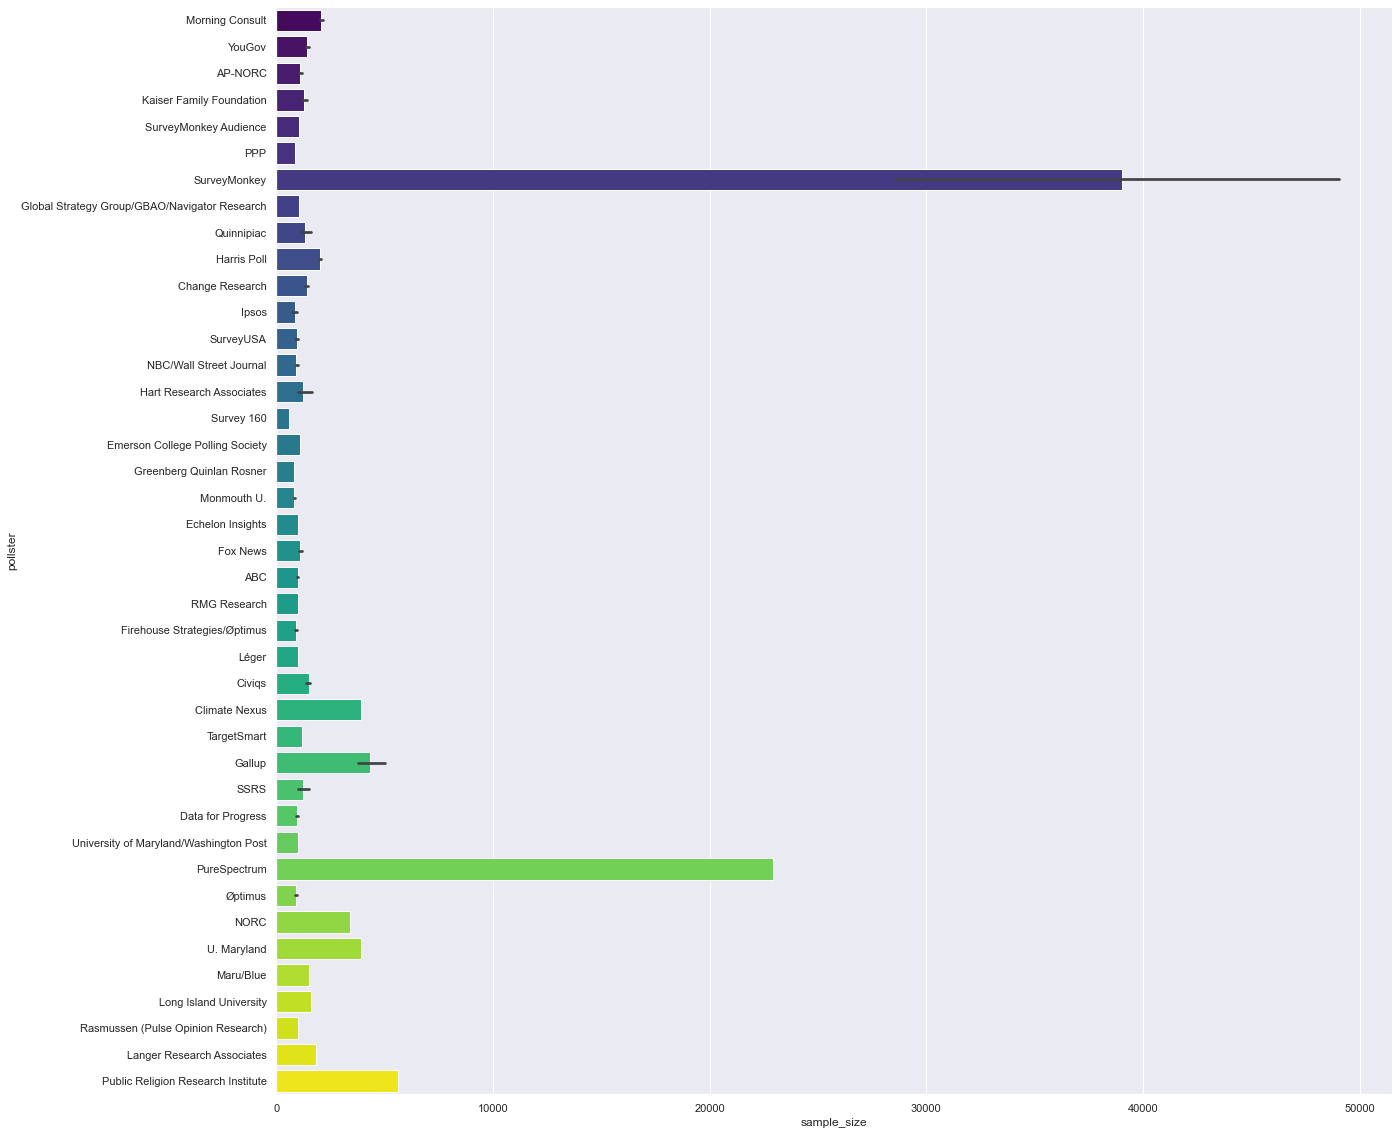

In [15]:
sns.set(rc={'figure.figsize':(20,20)})
sns.barplot(x = 'sample_size' ,y = 'pollster', data = df, saturation= 1,palette='viridis')

BreakDown of Subject and Sample Size

<AxesSubplot:xlabel='sample_size', ylabel='subject'>

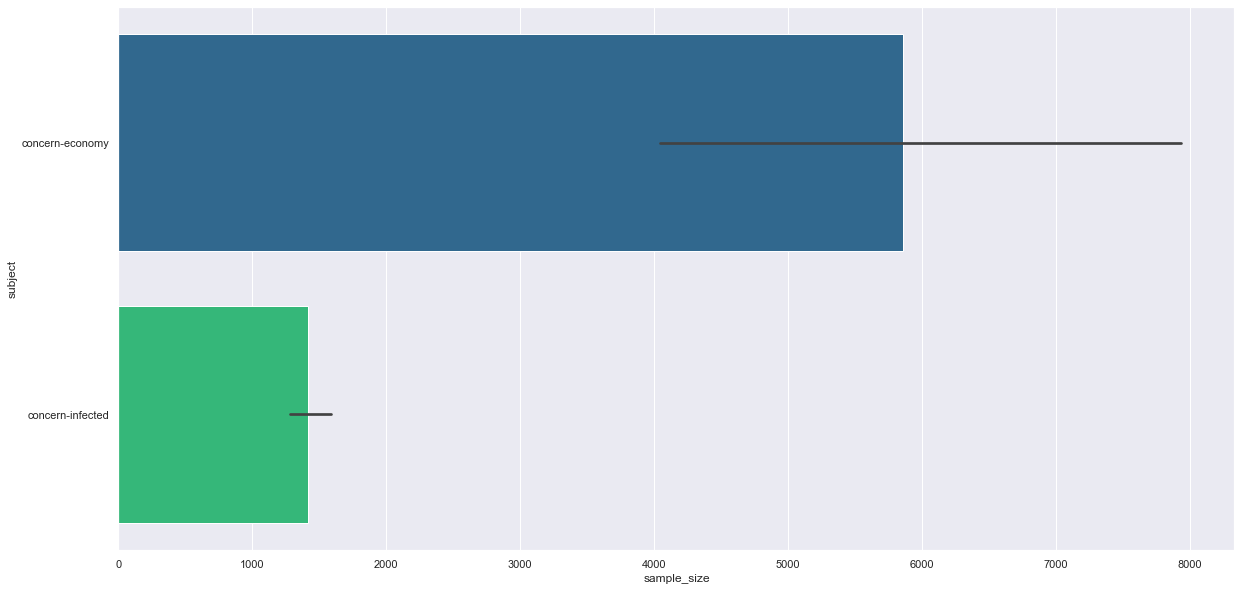

In [16]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x ='sample_size', y='subject', data =df, saturation = 1, palette='viridis' )

<AxesSubplot:xlabel='very', ylabel='subject'>

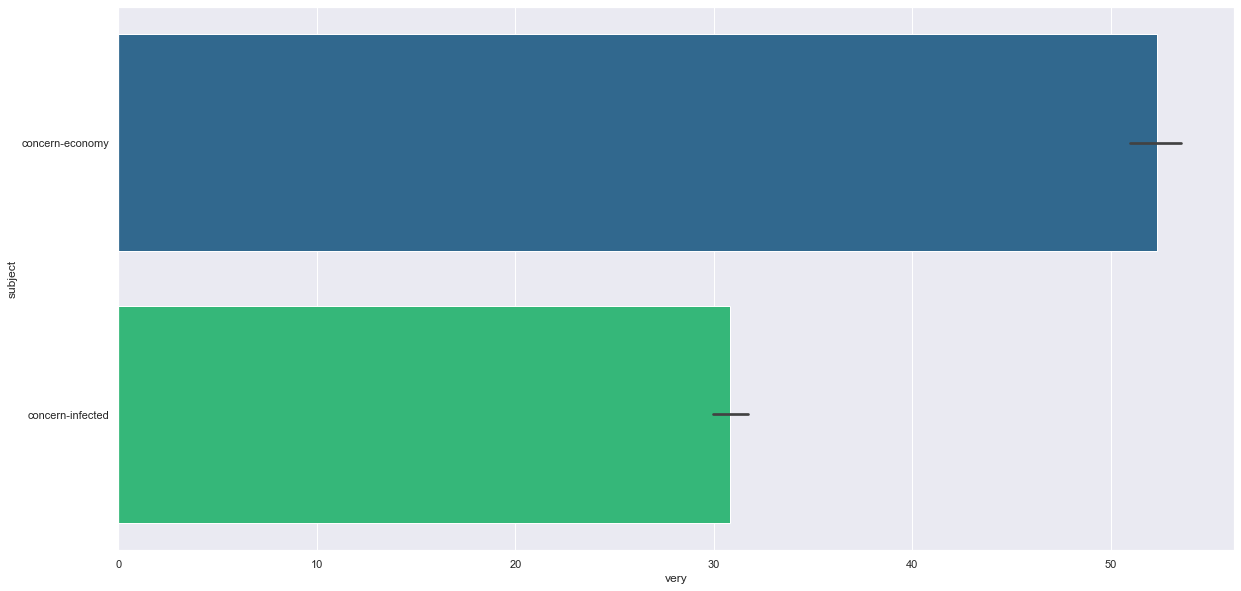

In [17]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x='very', y= 'subject', data = df, saturation = 1, palette='viridis')

<AxesSubplot:xlabel='somewhat', ylabel='subject'>

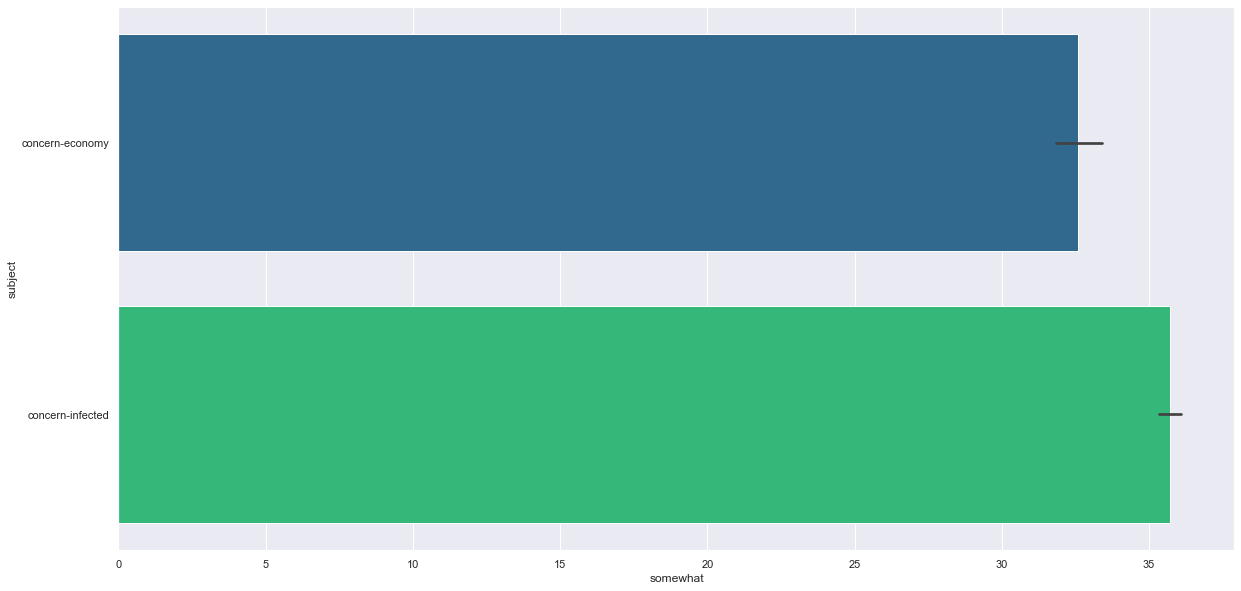

In [18]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x = 'somewhat', y='subject', data = df, saturation= 1, palette='viridis')

<AxesSubplot:xlabel='not_very', ylabel='subject'>

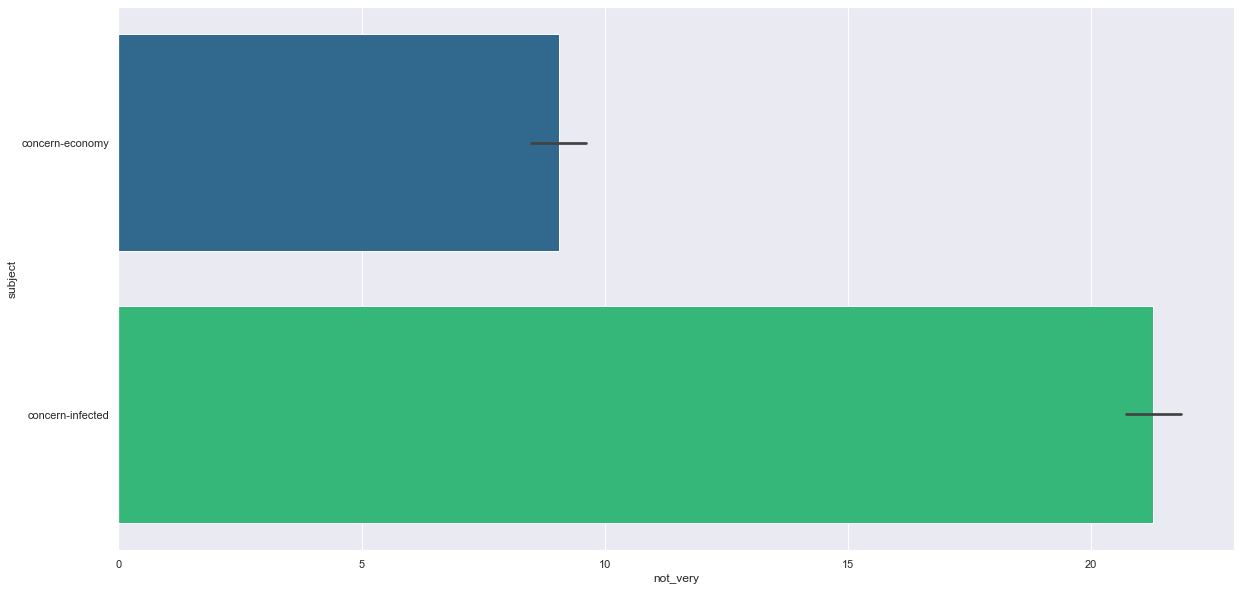

In [19]:
sns.set(rc={'figure.figsize': (20,10)})
sns.barplot(x = 'not_very', y='subject', data = df , saturation = 1, palette='viridis')

<AxesSubplot:xlabel='not_at_all', ylabel='subject'>

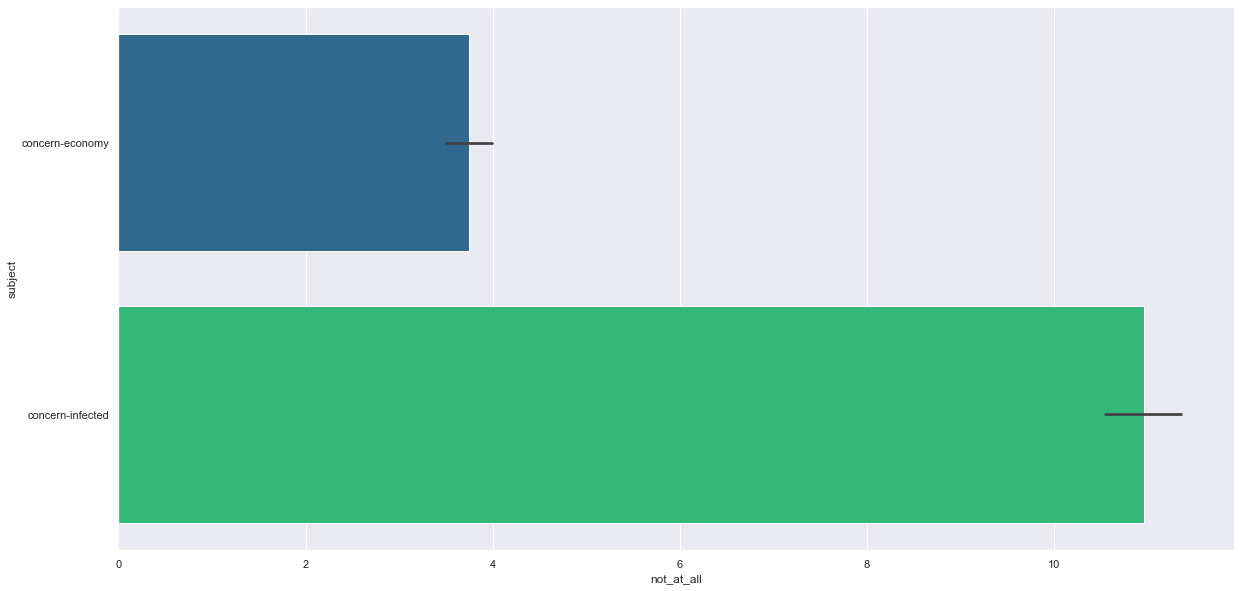

In [20]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x = 'not_at_all', y='subject', data = df, saturation = 1, palette='viridis')

Top 5 Questions for Each Answer

Text(0, 0.5, 'Questions')

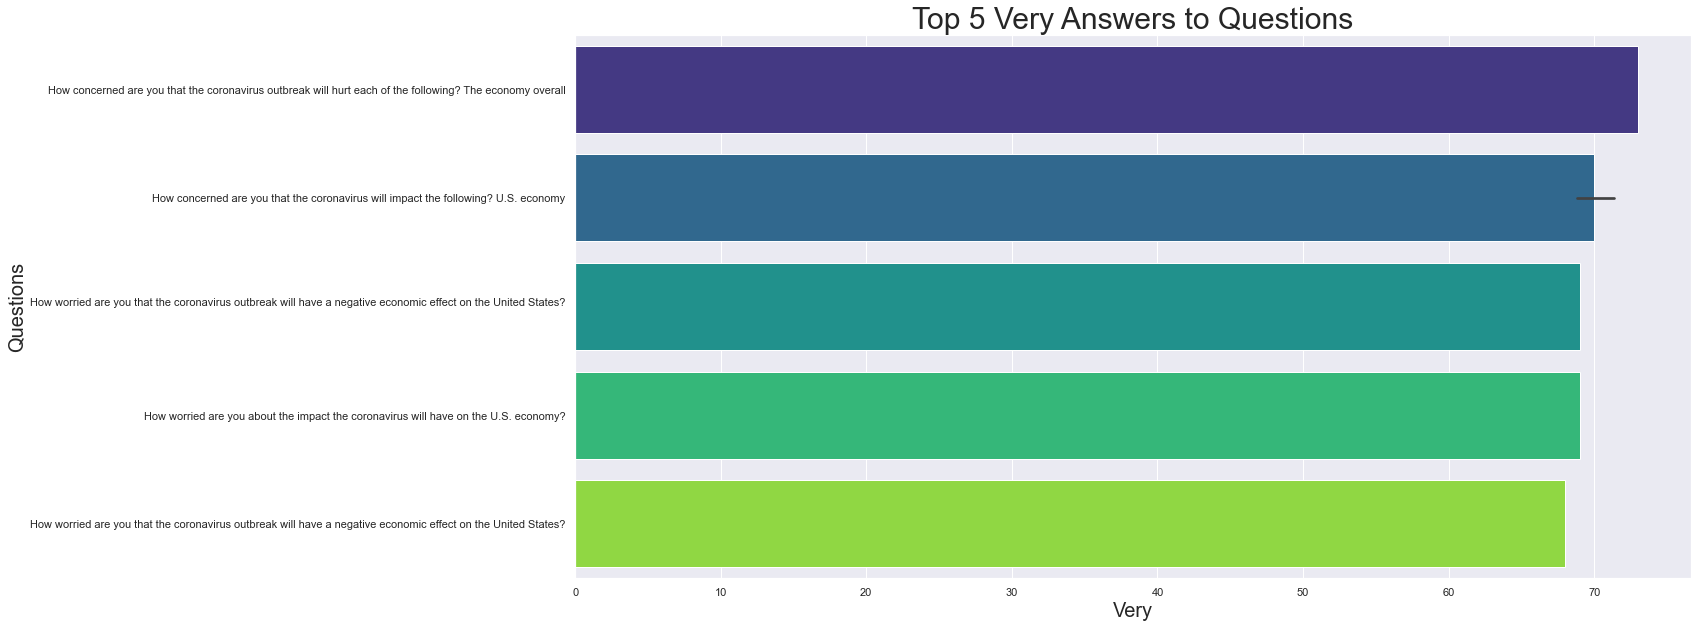

In [21]:
info = pd.DataFrame(df['very'].sort_values(ascending = False))

info['text'] = df['text']
data = list(map(str,(info['text'])))
x = list(data[:10])
y = list(info['very'][:10])

ax = sns.barplot(x=y, y=x,saturation=1, palette='viridis')


sns.set(rc={'figure.figsize':(20,20)})
ax.set_title('Top 5 Very Answers to Questions',fontsize = 30)
ax.set_xlabel('Very', fontsize = 20)
ax.set_ylabel('Questions', fontsize = 20)


Text(0, 0.5, 'Questions')

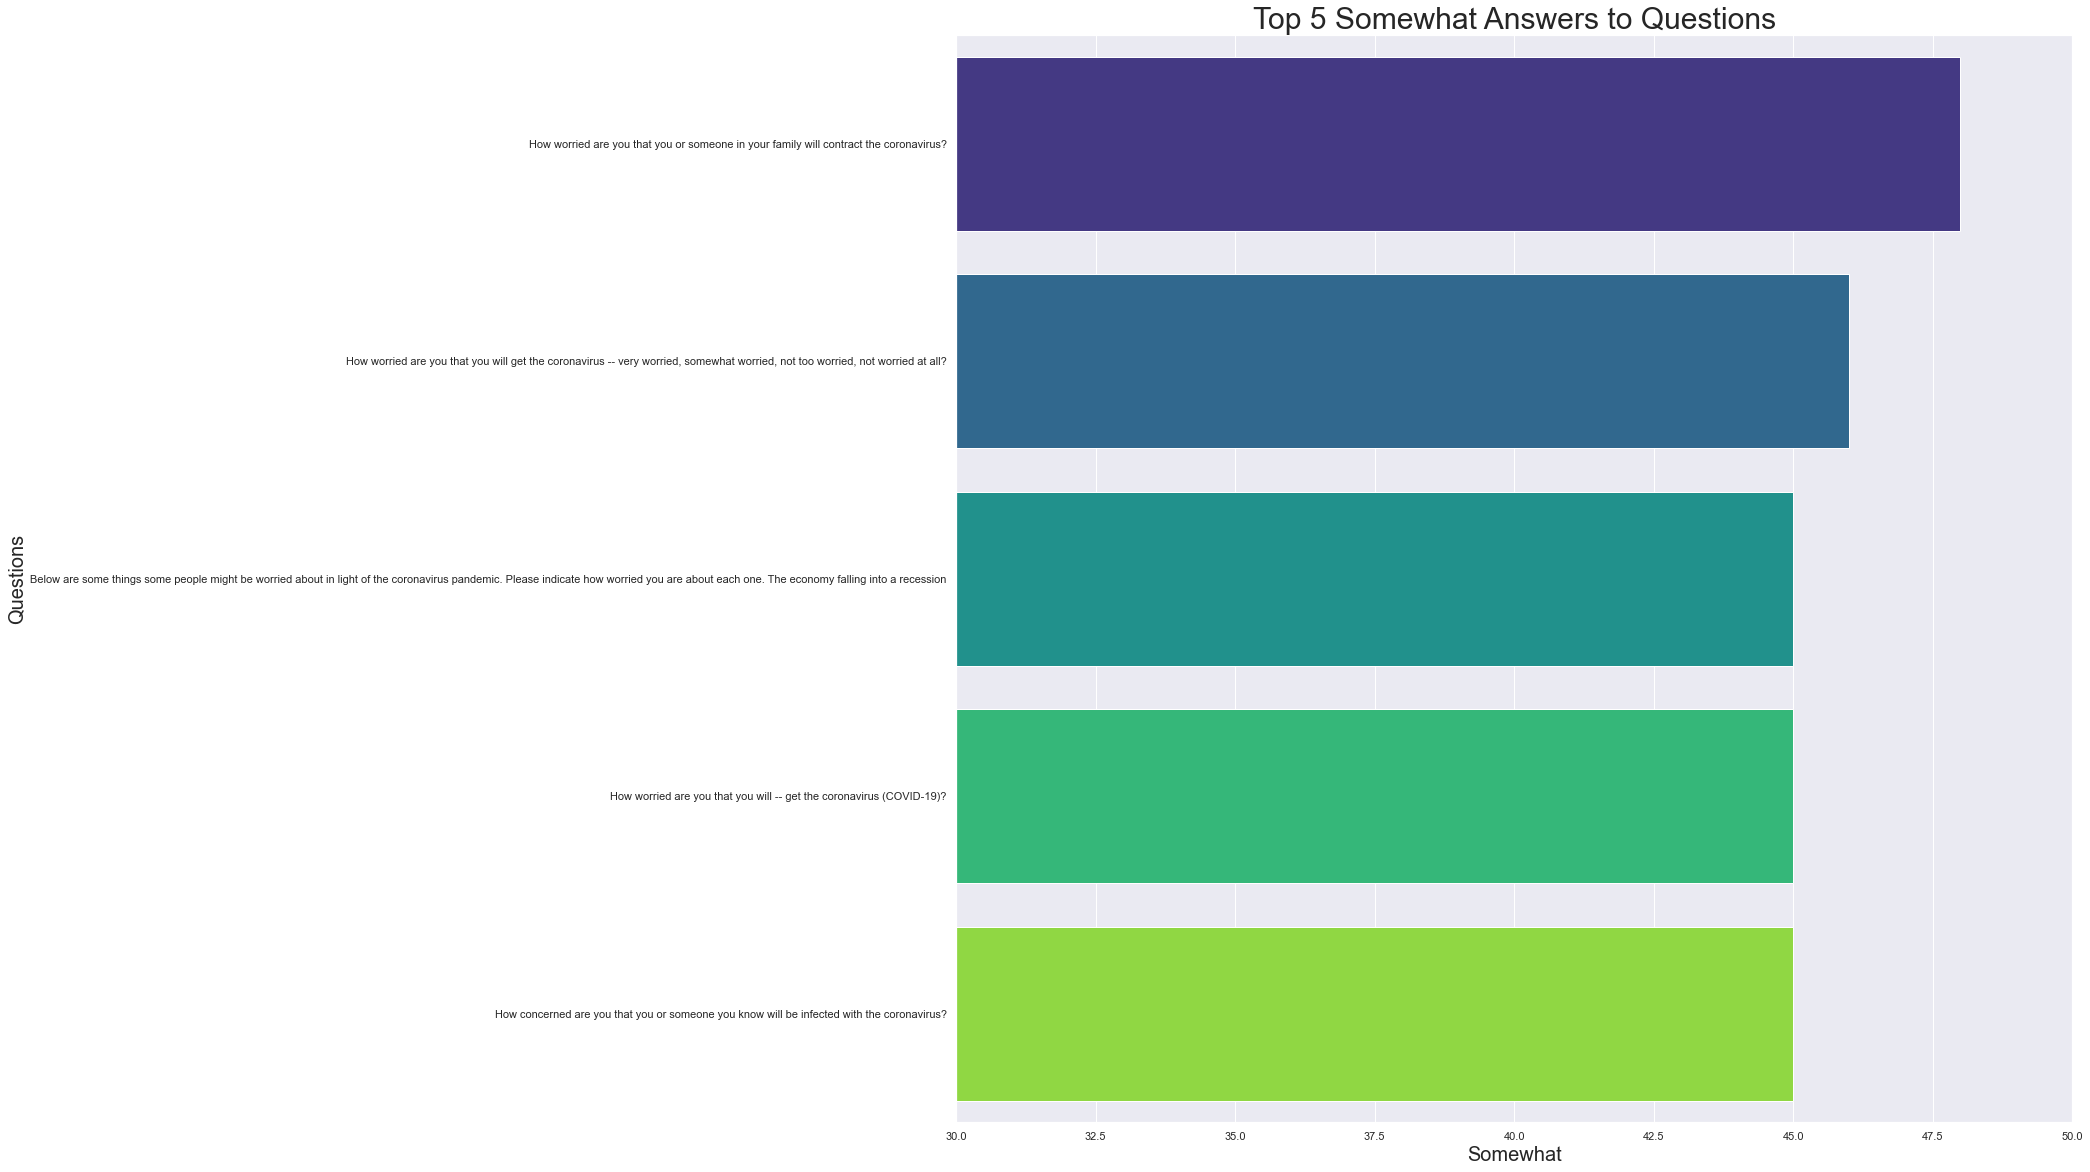

In [25]:
info = pd.DataFrame(df['somewhat'].sort_values(ascending = False))

info['text'] = df['text']
data = list(map(str,(info['text'])))
x = list(data[:6])
y = list(info['somewhat'][:6])

ax = sns.barplot(x=y, y=x, saturation = 1, palette='viridis')


sns.set(rc={'figure.figsize':(20,20)})
ax.set_title('Top 5 Somewhat Answers to Questions',fontsize = 30)
ax.set_xlabel('Somewhat', fontsize = 20)
ax.set_xlim(30,50,5)
ax.set_ylabel('Questions', fontsize = 20)

Text(0, 0.5, 'Questions')

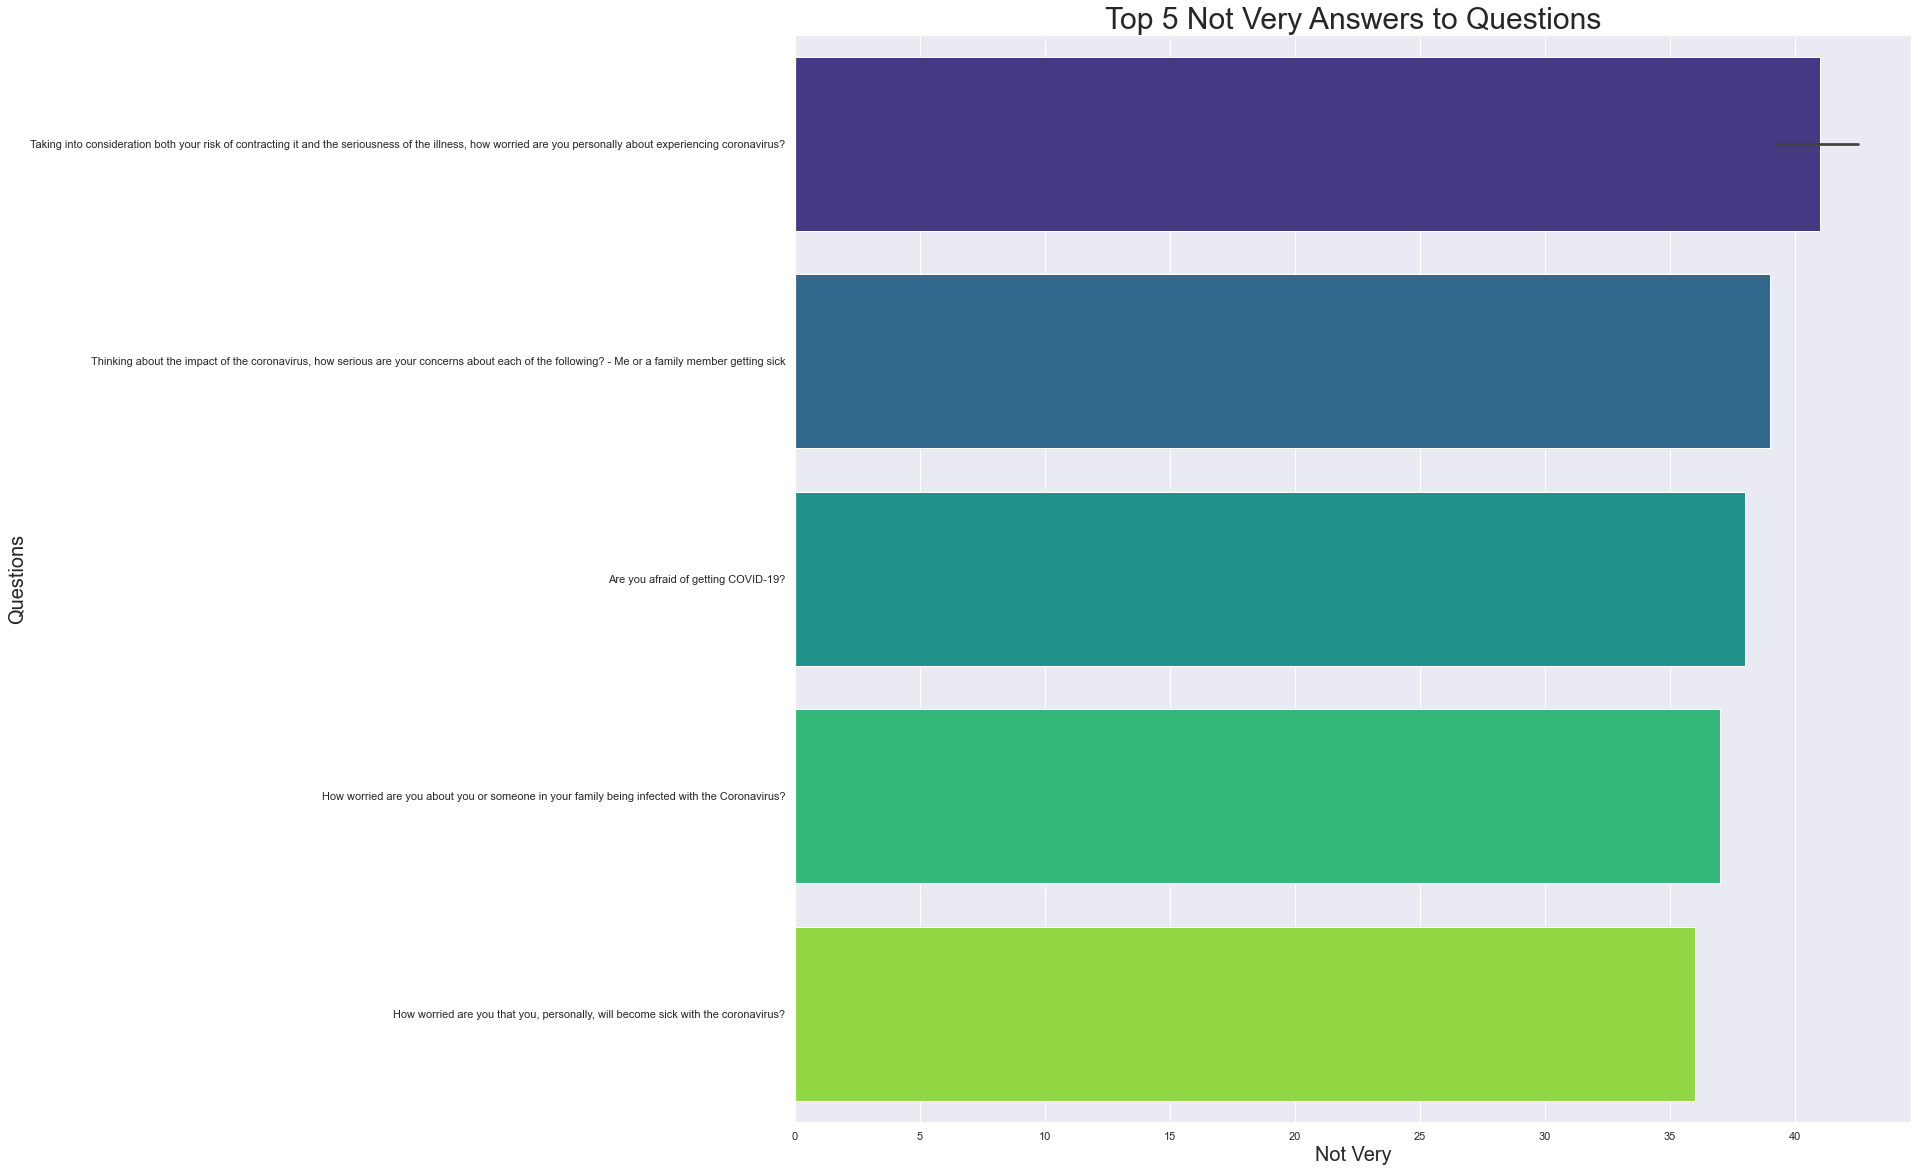

In [23]:
info = pd.DataFrame(df['not_very'].sort_values(ascending = False))

info['text'] = df['text']
data = list(map(str,(info['text'])))
x = list(data[:8])
y = list(info['not_very'][:8])

ax = sns.barplot(x=y, y=x, saturation = 1, palette='viridis')


sns.set(rc={'figure.figsize':(20,20)})
ax.set_title('Top 5 Not Very Answers to Questions',fontsize = 30)
ax.set_xlabel('Not Very', fontsize = 20)
ax.set_ylabel('Questions', fontsize = 20)

Text(0, 0.5, 'Questions')

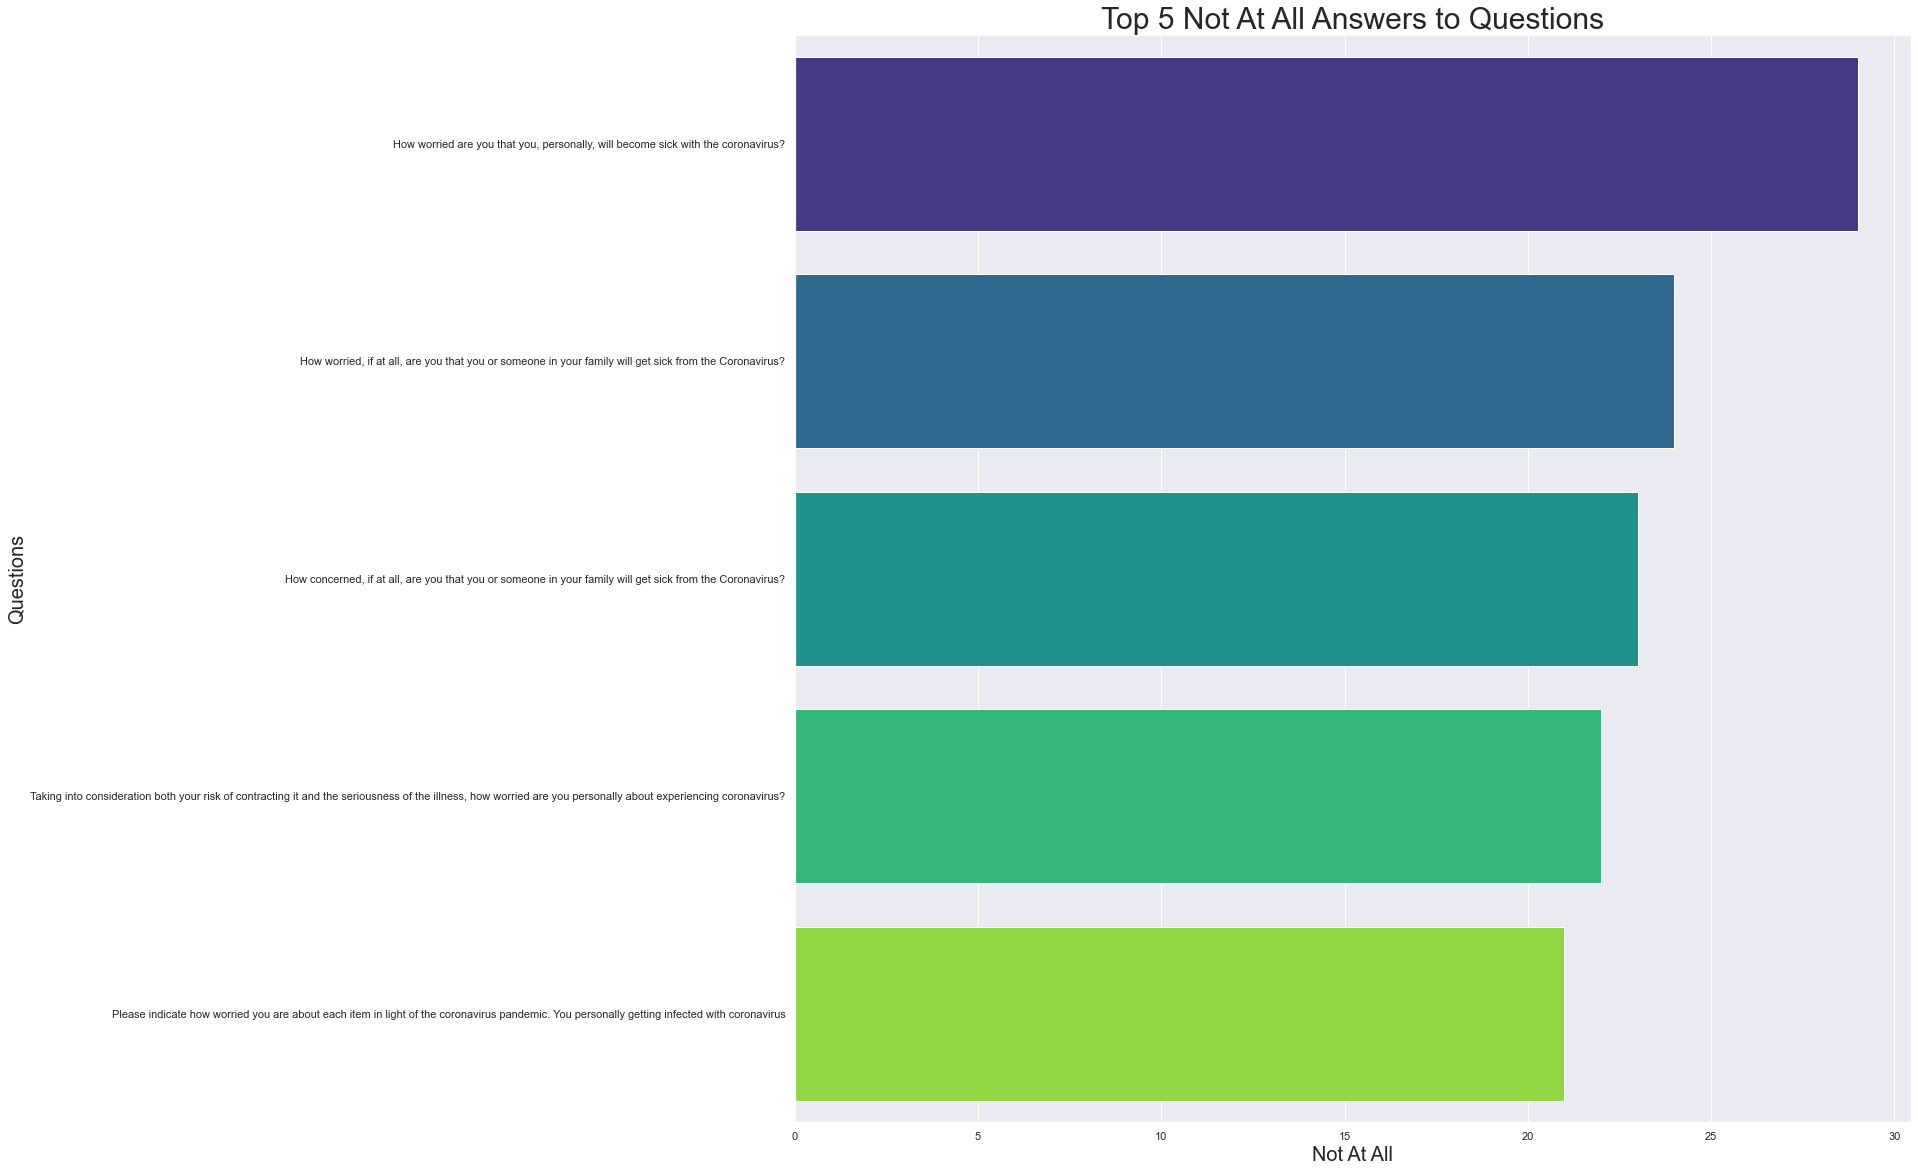

In [24]:
info = pd.DataFrame(df['not_at_all'].sort_values(ascending = False))

info['text'] = df['text']
data = list(map(str,(info['text'])))
x = list(data[:5])
y = list(info['not_at_all'][:5])

ax = sns.barplot(x=y, y=x, saturation = 1, palette='viridis')


sns.set(rc={'figure.figsize':(20,20)})
ax.set_title('Top 5 Not At All Answers to Questions',fontsize = 30)
ax.set_xlabel('Not At All', fontsize = 20)
ax.set_ylabel('Questions', fontsize = 20)